<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/Current_Magnetic_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install magpylib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 3.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import magpylib as magpy

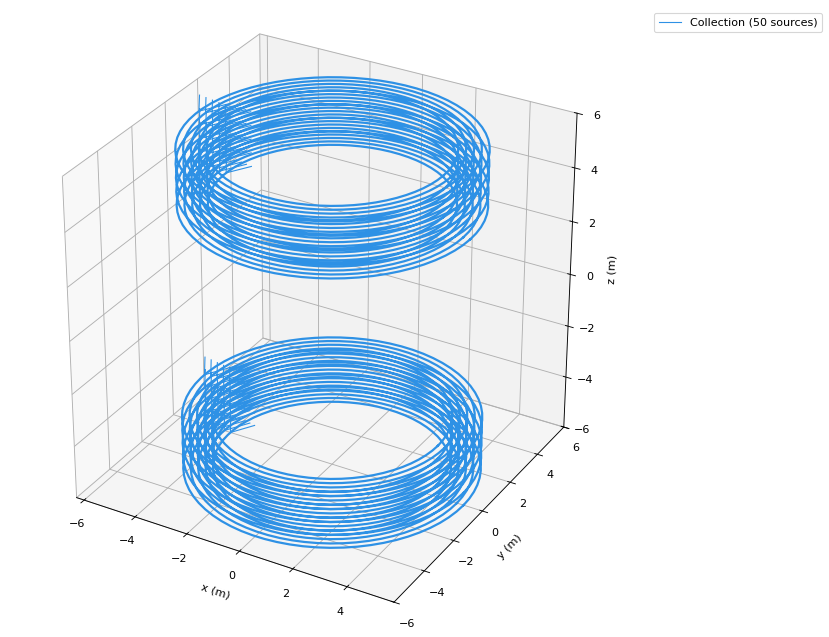

In [4]:
# Continuation from above - ensure previous code is executed

# Create a finite sized Helmholtz coil-pair
coil1 = magpy.Collection()
for z in np.linspace(-1, 1, 5):
    for r in np.linspace(4, 5, 5):
        winding = magpy.current.Circle(
            current=10,
            diameter=2*r,
            position=(0,0,z),
        )
        coil1.add(winding)

coil1.position = (0,0,5)
coil2 = coil1.copy(position=(0,0,-5))

helmholtz = magpy.Collection(coil1, coil2)

helmholtz.show()

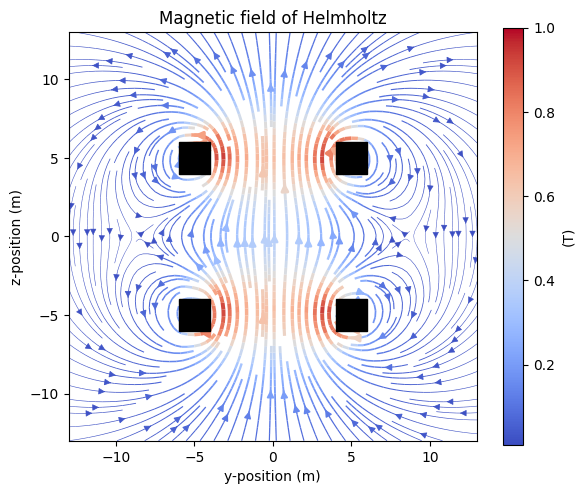

In [5]:
# Continuation from above - ensure previous code is executed

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,5))

# Compute field and plot the coil pair field on yz-grid
grid = np.mgrid[0:0:1j, -13:13:20j, -13:13:20j].T[:,:,0]
_, Y, Z = np.moveaxis(grid, 2, 0)

B = magpy.getB(helmholtz, grid)
_, By, Bz = np.moveaxis(B, 2, 0)

Bamp = np.linalg.norm(B, axis=2)
Bamp /= np.amax(Bamp)

sp = ax.streamplot(Y, Z, By, Bz, density=2, color=Bamp,
    linewidth=np.sqrt(Bamp)*3, cmap='coolwarm',
)

# Plot coil outline
from matplotlib.patches import Rectangle
for loc in [(4,4), (4,-6), (-6,4), (-6,-6)]:
    ax.add_patch(Rectangle(loc, 2, 2, color='k', zorder=10))

# Figure styling
ax.set(
    title='Magnetic field of Helmholtz',
    xlabel='y-position (m)',
    ylabel='z-position (m)',
    aspect=1,
)
plt.colorbar(sp.lines, ax=ax, label='(T)')

plt.tight_layout()
plt.show()

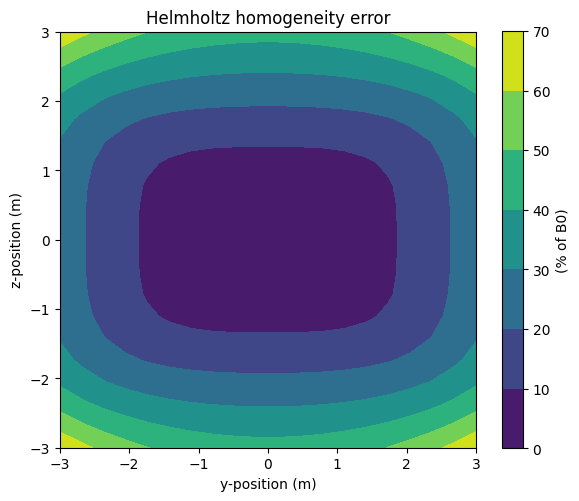

In [6]:
# Continuation from above - ensure previous code is executed

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,5))

# Compute field of the coil pair on yz-grid
grid = np.mgrid[0:0:1j, -3:3:20j, -3:3:20j].T[:,:,0]
_, Y, Z = np.moveaxis(grid, 2, 0)

B = helmholtz.getB(grid)

# Field at center
B0 = helmholtz.getB((0,0,0))
B0amp = np.linalg.norm(B0)

# Homogeneity error
err = np.linalg.norm((B-B0)/B0amp, axis=2)

# Plot error on grid
sp = ax.contourf(Y, Z, err*100)

# Figure styling
ax.set(
    title='Helmholtz homogeneity error',
    xlabel='y-position (m)',
    ylabel='z-position (m)',
    aspect=1,
)
plt.colorbar(sp, ax=ax, label='(% of B0)')

plt.tight_layout()
plt.show()